In [29]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
from sklearn.metrics import roc_curve, roc_auc_score, auc
%matplotlib inline

In [30]:
DATA_PATH = '~/Documents/Academic/Spring 2016/Stat 151a/'

# data = pd.DataFrame.from_csv(DATA_PATH + 'atlas-higgs-challenge-2014-v2.csv', index_col = 0)
data = pd.DataFrame.from_csv(DATA_PATH + 'higgs_challenge_subset.csv', index_col=0)

In [31]:
data = data.drop('KaggleSet', 1)
data = data.drop('KaggleWeight', 1)
# data = data.drop('Weight', 1)
# data = data.drop('DER_deltaeta_jet_jet', 1)
# data = data.drop('DER_mass_jet_jet', 1)
# data = data.drop('DER_prodeta_jet_jet', 1)
# data = data.drop('DER_lep_eta_centrality', 1)
# data = data.drop('PRI_jet_leading_pt',1)
# data = data.drop('PRI_jet_leading_eta',1)
# data = data.drop('PRI_jet_leading_phi',1)
# data = data.drop('PRI_jet_subleading_pt',1)
# data = data.drop('PRI_jet_subleading_eta',1)
# data = data.drop('PRI_jet_subleading_phi',1)
data

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s
100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,0.681042,b
100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,0.715742,b
100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.660654,b
100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.904263,b
100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.025434,b
100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.000814,s
100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.005721,s
100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.614803,b


In [32]:
responses = data['Label']
predictors = data.drop('Label', 1)
weights = data['Weight']
predictors = predictors.drop('Weight', 1)
# predictors = pd.DataFrame.from_csv(DATA_PATH + 'reduced.csv', index_col = None)
print (responses.shape)
print (predictors.shape)
print (predictors)
responses = responses.replace({'s': 1, 'b': 0})

(50000,)
(50000, 30)
         DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
EventId                                                                      
100000        138.470                       51.655        97.827    27.980   
100001        160.937                       68.768       103.235    48.146   
100002       -999.000                      162.172       125.953    35.635   
100003        143.905                       81.417        80.943     0.414   
100004        175.864                       16.915       134.805    16.405   
100005         89.744                       13.550        59.149   116.344   
100006        148.754                       28.862       107.782   106.130   
100007        154.916                       10.418        94.714    29.169   
100008        105.594                       50.559       100.989     4.288   
100009        128.053                       88.941        69.272   193.392   
100010       -999.000                      

**Normalize the data**  

In [ ]:
from sklearn import preprocessing
col_names = list(predictors.columns.values)
# print (predictors)
for name in col_names:
#     print (name)
    col = predictors[name]
#     print (col)
    print (col.mean(), col.max(), col.min())
    predictors[name] = (predictors[name] - col.mean()) / (col.max() - col.min())
# predictors

In [92]:
def randomize_oneoutoften():
    test_indices = random.sample(list(data.index), 5000)  #1/10 test
    train_indices = list(data.index.drop(test_indices))
    print (len(train_indices))
    print (len(data.index))
    print (len(test_indices))
    test_x = predictors.ix[test_indices]
    test_y = responses.ix[test_indices]
    train_x = predictors.ix[train_indices]
    train_y = responses.ix[train_indices]
    print (len(test_y))
    print (len(train_y))

In [111]:
import math
def calculate_ams(predicted_labels):
    s_weight = 0
    b_weight = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == 1:
            if responses[100000+i] == 1:
                s_weight += weights[100000+i]
            else:
                b_weight += weights[100000+i]
    print ("s_weight is", s_weight)
    print ("b_weight is", b_weight)
    return s_weight/math.sqrt(b_weight)

**Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression
def logistic_regression_cross_validation(penalty, c):
    lr = LogisticRegression(penalty=penalty, dual=False, tol=0.0001, 
                            C=c, fit_intercept=True, intercept_scaling=1, 
                            class_weight=None, random_state=None, 
                            solver='liblinear', max_iter=100, multi_class='ovr', 
                            verbose=0, warm_start=False, n_jobs=-1)
    lr.fit(train_x, np.array(train_y).ravel())

    lr_preds = lr.predict(test_x)
    print (lr_preds)
    ams = calculate_ams(lr_preds)
    
    lr_preds_proba = lr.predict_proba(test_x)

    accuracy = np.mean(lr_preds == np.array(test_y).ravel())
    lr_predsTrue = lr_preds_proba[:,1]
    
    rc = roc_curve(np.array(test_y).ravel(), lr_predsTrue)
    plt.plot(rc[0],rc[1])
    roc_score = roc_auc_score(np.array(test_y).ravel(), lr_predsTrue)
    return accuracy, roc_score, ams

45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04483720362
b_weight is 675.768196304
l1 0.1 0.7518 0.81916105947 0.0401929380613
45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04391489669
b_weight is 675.768196304
l1 0.1 0.7518 0.819150560435 0.0401574586343
45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04483720362
b_weight is 675.768196304
l1 0.1 0.7518 0.819167376686 0.0401929380613
45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04565168402
b_weight is 675.871476086
l1 0.1 0.7518 0.819140417299 0.0402211961542
45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04483720362
b_weight is 675.768196304
l1 0.1 0.7518 0.819159991772 0.0401929380613
45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04437617827
b_weight is 675.768196304
l1 0.1 0.752 0.819154831229 0.0401752032759
45000
50000
5000
5000
45000
[0 0 0 ..., 0 0 0]
s_weight is 1.04565168402
b_weight is 675.871476086
l1 0.1 0.7518 0.819136146505 0.04022119

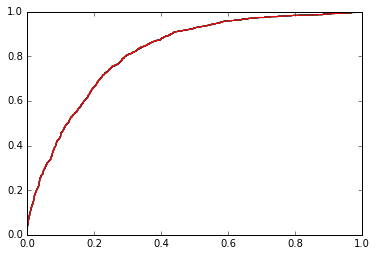

In [97]:
# penalty = ["l1", "l2"]
# Cs = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
penalty = ["l1"]
Cs = [0.1]
res = []
for p in penalty:
    for c in Cs:
        total_ams = 0
        for i in range(10):
            randomize_oneoutoften()
            accuracy, roc, ams = logistic_regression_cross_validation(p,c)
            res.append([p,c,accuracy, roc, ams])
            print (p,c,accuracy, roc, ams)
            total_ams += ams
print (total_ams)

**AMS 
0.389967789548 l2
0.40187947823 l1
0.7281539 random forest
0.536816880387 naive bayes
0.481597580231 knn
0.659964794125 linear svm
0.111372178503 non-linear svm
0.449533388701 gradient boosting
0.431365893512 adaboosting
0.483791286496 deep learning

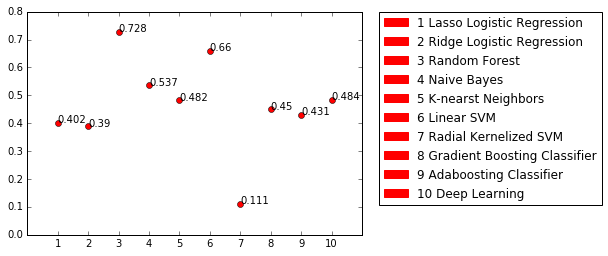

In [164]:
import matplotlib.patches as mpatches
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0.402, 0.390, 0.728,
              0.537, 0.482, 0.660, 
              0.111, 0.450, 0.431,
              0.484])
my_xticks = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x, my_xticks)
l1 = mpatches.Patch(color = 'red', label='1 Lasso Logistic Regression')
l2 = mpatches.Patch(color = 'red',label='2 Ridge Logistic Regression')
l3 = mpatches.Patch(color = 'red',label='3 Random Forest')
l4 = mpatches.Patch(color = 'red',label='4 Naive Bayes')
l5 = mpatches.Patch(color = 'red',label='5 K-nearst Neighbors')
l6 = mpatches.Patch(color = 'red',label='6 Linear SVM')
l7 = mpatches.Patch(color = 'red',label='7 Radial Kernelized SVM')
l8 = mpatches.Patch(color = 'red',label='8 Gradient Boosting Classifier')
l9 = mpatches.Patch(color = 'red',label='9 Adaboosting Classifier')
l10 = mpatches.Patch(color = 'red',label='10 Deep Learning')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           handles = [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10])
plt.plot(x, y, 'ro')
plt.xlim([0,11])
plt.ylim([0.0,0.8])
for i in range(10):
    plt.annotate(str(y[i]), (x[i],y[i]))
plt.show()

**Logistic Regression results  penalty, c, accuracy roc_score**  
l1 0.001 0.7376 0.791107251099
l1 0.01 0.7446 0.80991604563
**l1 0.1 0.7472 0.811437155139**
l1 1.0 0.747 0.811491173844
l1 10.0 0.7472 0.811486702097
l1 100.0 0.747 0.811484376789
l1 1000.0 0.747 0.811492425934
l2 0.001 0.7392 0.804206340007
l2 0.01 0.7412 0.809954681526
l2 0.1 0.7454 0.810630988564
**l2 1.0 0.7458 0.810602369382**  
l2 10.0 0.7442 0.810488250395
l2 100.0 0.7456 0.810630630824
l2 1000.0 0.7454 0.810625801337

**Random Forest**  

In [70]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_cross_validation(n_estimators, criterion, max_depth, bootstrap):
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, 
                                              min_samples_split=5, min_samples_leaf=1, 
                                              min_weight_fraction_leaf=0.0, max_features='auto', 
                                              max_leaf_nodes=None, bootstrap=bootstrap, 
                                              oob_score=False, n_jobs=-1, random_state=None, 
                                              verbose=0, warm_start=False, class_weight="balanced")
    rf.fit(train_x, np.array(train_y).ravel())
    rf_preds = rf.predict(test_x)
    rf_preds_proba = rf.predict_proba(test_x)

    accuracy = np.mean(rf_preds == np.array(test_y).ravel())

    rf_predsTrue = rf_preds_proba[:,1]
    rc = roc_curve(np.array(test_y).ravel(), rf_predsTrue)
    plt.plot(rc[0],rc[1])
    roc_score = roc_auc_score(np.array(test_y).ravel(), rf_predsTrue)
    print ("roc_score is", roc_score)
    return accuracy, roc_score

roc_score is 0.906395063477
1000 gini 20 True 0.8384 0.906395063477


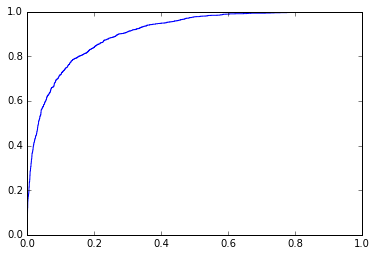

In [71]:
n_estimators = [1000]
criterions = ['gini']
max_depths = [20]
bootstraps = [True]
res = []
for c in criterions:
    for b in bootstraps:
        for n in n_estimators:
            for d in max_depths:
                accuracy, roc = random_forest_cross_validation(n, c, d, b)
                res.append([n,c,d,b,accuracy, roc])
                print (n,c,d,b,accuracy, roc)

**Results for Random Forest**  
500 gini 10 True 0.8216
500 gini 20 True 0.8412
500 gini 50 True 0.841
1000 gini 10 True 0.8212
1000 gini 20 True 0.8428
1000 gini 50 True 0.8394
500 gini 10 False 0.8198
500 gini 20 False 0.8414
500 gini 50 False 0.84
1000 gini 10 False 0.8214
1000 gini 20 False 0.8396
1000 gini 50 False 0.841

500 gini 10 True 0.8132
500 gini 20 True 0.8292
500 gini 50 True 0.8286
1000 gini 10 True 0.8138
1000 gini 20 True 0.8312
1000 gini 50 True 0.8298
500 gini 10 False 0.8112
500 gini 20 False 0.8276
500 gini 50 False 0.828
1000 gini 10 False 0.8106
1000 gini 20 False 0.8266
1000 gini 50 False 0.8298

**SVM**  

In [115]:
from sklearn.svm import SVC
def svm_cross_validation(c, ker, i):
    svm_clf = SVC(C=c, cache_size=200, class_weight=None, coef0=0.0, 
                  decision_function_shape=None, degree=3, gamma='auto', kernel=ker,
                  max_iter=i, probability=False, random_state=0, shrinking=True,
                  tol=0.001, verbose=False)
    svm_clf.fit(train_x, np.array(train_y).ravel())
    svm_preds = svm_clf.predict(test_x)
#     print(svm_preds)
#     print (len(svm_preds))
    ams = calculate_ams(svm_preds)
#     svm_preds_proba = svm_clf.predict_proba(test_x)
#         print (rf_preds)
#         print (rf_preds_proba)
    accuracy = np.mean(svm_preds == np.array(test_y).ravel())
#         print ("accuracy is", accuracy)

#         print (np.sum(rf_preds_proba, axis=1)) #check if row-based prob sums are all 1

#     rf_predsTrue = rf_preds_proba[:,1]
#     rc = roc_curve(np.array(test_y).ravel(), rf_predsTrue)
#     plt.plot(rc[0],rc[1])
#     roc_score = roc_auc_score(np.array(test_y).ravel(), rf_predsTrue)
#         print ("roc_score is", roc_score)
    return accuracy, ams

In [126]:
kernels = ["linear", "rbf"]
Cs = [0.001,0.01,0.1,1.0, 10.0, 100.0, 1000.0]
max_iters = [5,10,20]
res = []
for k in ['rbf']:
    for c in [1.0]:
        for i in [50]:
            total_ams = 0
            for j in range(10):
                randomize_oneoutoften()
                accuracy, ams = svm_cross_validation(c, k, i)
                res.append([k,c,i,accuracy])
                print (k,c,i,accuracy)
                print (ams)
                total_ams += ams
            print (total_ams)

45000
50000
5000
5000
45000


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372178503
45000
50000
5000
5000
45000
s_weight is 0.0119026465757
b_weight is 1.14217762206
rbf 1.0 50 0.658
0.0111372

**Naive Bayes**  

In [98]:
from sklearn.naive_bayes import BernoulliNB
def bnb_cross_validation(a):
    bnb = BernoulliNB(alpha = a)
    bnb.fit(train_x, np.array(train_y).ravel())
    bnb_preds = bnb.predict(test_x)
    bnb_preds_proba = bnb.predict_proba(test_x)
#         print (rf_preds)
    ams = calculate_ams(bnb_preds)
    accuracy = np.mean(bnb_preds == np.array(test_y).ravel())
    
    bnb_predsTrue = bnb_preds_proba[:,1]
    rc = roc_curve(np.array(test_y).ravel(), bnb_predsTrue)
    plt.plot(rc[0],rc[1])
    roc_score = roc_auc_score(np.array(test_y).ravel(), bnb_predsTrue)
    print ("roc_score is", roc_score)
    return accuracy, ams

45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.71582259403
b_weight is 1021.62717577
roc_score is 0.654844397181
0.01 0.6336 0.0536816880387
45000
50000
5000
5000
45000
s_weight is 1.715822

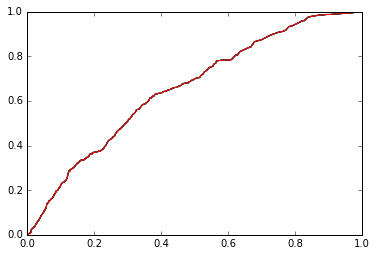

In [99]:
Cs = [0.001,0.01,0.1,1.0, 10.0, 100.0, 1000.0]
res = []
for c in [0.01]:
    total_ams = 0
    for i in range(10):
        randomize_oneoutoften()
        accuracy, ams = bnb_cross_validation(c)
        res.append([c, accuracy])
        print (c,accuracy, ams)
        total_ams += ams
print (total_ams)

0.001 0.6564
0.01 0.6564
0.1 0.6564
1.0 0.6564
10.0 0.6564
100.0 0.656
1000.0 0.6538

**KNN**  

45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847.638022182
roc_score is 0.848361990361
7 0.7926
0.0481597580231
45000
50000
5000
5000
45000
s_weight is 1.40213396886
b_weight is 847

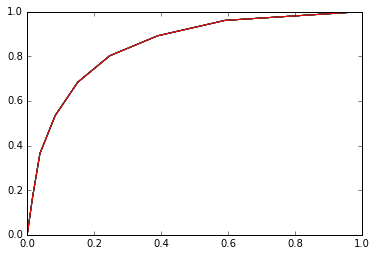

In [101]:
from sklearn.neighbors import KNeighborsClassifier
nn = [3, 5, 6, 7, 8, 10]
max_accur = 0
best_k = 0
for k in [7]:
    total_ams = 0
    for i in range(10):
        randomize_oneoutoften()
        knnc = KNeighborsClassifier(n_neighbors=k)
        knnc.fit(train_x, np.array(train_y).ravel())
        knn_preds = knnc.predict(test_x)
        knn_preds_proba = knnc.predict_proba(test_x)
    #         print (rf_preds)
        ams = calculate_ams(knn_preds)
        accuracy = np.mean(knn_preds == np.array(test_y).ravel())

        knn_predsTrue = knn_preds_proba[:,1]
        rc = roc_curve(np.array(test_y).ravel(), knn_predsTrue)
        plt.plot(rc[0],rc[1])
        roc_score = roc_auc_score(np.array(test_y).ravel(), knn_predsTrue)
        print ("roc_score is", roc_score)
        print (k, accuracy)
        print (ams)
        total_ams += ams
    print (total_ams)

3 0.708
5 0.7212
6 0.7206
7 0.724
8 0.7184
10 0.7192

**Gradient tree boosting Classfier**  

45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.2754519064
b_weight is 805.015544171
[0 0 0 ..., 0 0 0]
0.8304 0.802047988065
0.0449533388701
45000
50000
5000
5000
45000
s_weight is 1.275451

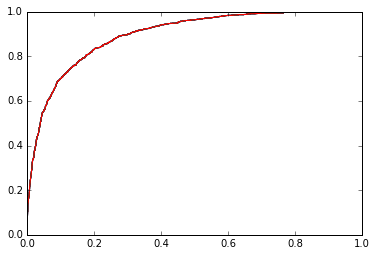

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

for n in [100]:
    for l in [0.1]:
        total_ams = 0
        for i in range(10):
            randomize_oneoutoften()
            clf = GradientBoostingClassifier(loss="deviance", n_estimators=n, learning_rate=l, 
                                             max_depth=3, random_state=0, 
                                             max_features="auto").fit(train_x, np.array(train_y).ravel())

            gradient_boosting_prediction = clf.predict(test_x)
            ams = calculate_ams(gradient_boosting_prediction)
            
            grad_preds_proba = clf.predict_proba(test_x)

            grad_predsTrue = grad_preds_proba[:,1]
            rc = roc_curve(np.array(test_y).ravel(), grad_predsTrue)
            plt.plot(rc[0],rc[1])
            print (gradient_boosting_prediction)
            accuracy = np.mean(gradient_boosting_prediction == np.array(test_y).ravel())
            roc_score = roc_auc_score(np.array(test_y).ravel(), gradient_boosting_prediction)
            print (accuracy, roc_score)
            print (ams)
            total_ams += ams
        print (total_ams)

**n=100 c=0.1 0.834 0.803674559837**  

**Adaboosting using Random Forest**  

45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_weight is 748.400401725
[0 0 0 ..., 0 0 0]
0.807 0.768181125796
0.0431365893512
45000
50000
5000
5000
45000
s_weight is 1.1800836956
b_

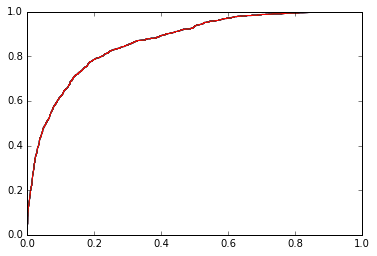

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
for n in [100]:
    for l in [0.1]:
        total_ams = 0
        for i in range(10):
            randomize_oneoutoften()
            adaclf = AdaBoostClassifier(n_estimators=n, learning_rate=l).fit(train_x, np.array(train_y).ravel())

            adaboosting_prediction = adaclf.predict(test_x)
            ams = calculate_ams(adaboosting_prediction)
            
            ada_preds_proba = adaclf.predict_proba(test_x)

            ada_predsTrue = ada_preds_proba[:,1]
            rc = roc_curve(np.array(test_y).ravel(), ada_predsTrue)
            plt.plot(rc[0],rc[1])
            print (adaboosting_prediction)
            accuracy = np.mean(adaboosting_prediction == np.array(test_y).ravel())
            roc_score = roc_auc_score(np.array(test_y).ravel(), adaboosting_prediction)
            print (accuracy, roc_score)
            print (ams)
            total_ams += ams
        print (total_ams)

**Deep Learning - Multilayer perceptrion**  

45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight is 851.00586191
0.7124 0.675331395816
0.0483791286496
45000
50000
5000
5000
45000
s_weight is 1.41131617141
b_weight i

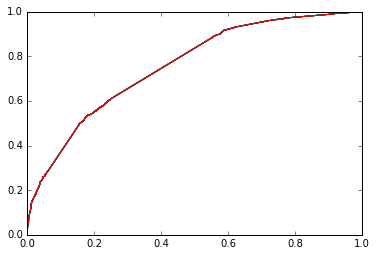

In [106]:
from sklearn.neural_network import MLPClassifier
total_ams = 0
for i in range(10):
    randomize_oneoutoften()
    mlp_clf = MLPClassifier(activation='logistic', alpha=1e-05,
           hidden_layer_sizes=(50,50,50,50,50), learning_rate='constant',
           learning_rate_init=0.001, max_iter=200, momentum=0.9,
           nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
           tol=0.0001, validation_fraction=0.1, verbose=False,
           warm_start=False)
    mlp_clf.fit(train_x, np.array(train_y).ravel()) 
    mlp_prediction = mlp_clf.predict(test_x)
    ams = calculate_ams(mlp_prediction)
    
    mlp_preds_proba = mlp_clf.predict_proba(test_x)

    mlp_predsTrue = mlp_preds_proba[:,1]
    rc = roc_curve(np.array(test_y).ravel(), mlp_predsTrue)
    plt.plot(rc[0],rc[1])
    # print (adaboosting_prediction)
    accuracy = np.mean(mlp_prediction == np.array(test_y).ravel())
    roc_score = roc_auc_score(np.array(test_y).ravel(), mlp_prediction)
    print (accuracy, roc_score)
    print (ams)
    total_ams += ams
print (total_ams)

**0.785 0.766249431278**  